# 计算物理基础第二章：迭代与分形图形

In [1]:
import numpy as np, matplotlib.pyplot as plt
from IPython.display import Latex

### 1. 斐波那契数列

编写函数文件，求小于任意自然数$n$的斐波那契数列各项，斐波那契数列定义如下：

$$\left\{\begin{align}
        &f_1 = 1&(n=1)\\
        &f_2 = 1&(n=2)\\
        &f_n = f_{n-1} + f_{n-2}&(n\le3)
        \end{align}
        \right.$$

### 第一种:递归

In [6]:
def Fibonacci(n):
    if n == 1 or n == 2:
        return 1
    else: 
        return Fibonacci(n-1) + Fibonacci(n-2)
n = 10
f = []
for i in range(n):
    f.append(Fibonacci(i+1))
print(f)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


### 第二种:循环

In [8]:
def Fibonacci_Loop_tool(n):
    a, b = 0, 1
    while n > 0:
        a, b = b, a + b
        n -= 1
def Fibonacci_Loop(n):
    result_list = []
    a, b = 0, 1
    while n > 0:
        result_list.append(b)
        a, b = b, a + b
        n -= 1
    return result_list
Fibonacci_Loop(5)

[1, 1, 2, 3, 5]

### 第三种：yield关键字

In [11]:
def Fibonacci_Yield_tool(n):
    a, b = 0, 1
    while n > 0:
        yield b
        a, b = b, a + b
        n -= 1


def Fibonacci_Yield(n):
    # return [f for i, f in enumerate(Fibonacci_Yield_tool(n))]
    return list(Fibonacci_Yield_tool(n))
Fibonacci_Yield(5)

[1, 1, 2, 3, 5]

### 第四种,矩阵求解_直接求出第n位数值

In [12]:
Matrix = np.matrix('1 1;1 0')
# 其n-1 次方的第一位,也就是Matrix(11)--下标11就是斐波那契数列的解
def Fibonacci_Matrix_tool(n): # 递归求解,速度慢与直接求方
    Matrix = np.matrix('1 1;1 0')
    if n == 1:
        return Matrix
    if n == 2:
        return pow(Matrix, 2)
    elif n % 2 == 1:
        return Fibonacci_Matrix_tool((n - 1) / 2) ** 2 * Matrix
    else:
        return Fibonacci_Matrix_tool(n / 2) ** 2


def Fibonacci_Matrix_tool2(n):
    Matrix = np.matrix('1 1;1 0')
    return pow(Matrix, n) # pow函数速度快于 使用双星号 "**"


def Fibonacci_Matrix(n):
    result_list = []
    for i in range(0, n): result_list.append(np.array(Fibonacci_Matrix_tool2(i))[0][0])
    return result_list

### 下面解法来自2016级天文班薛王陈

In [5]:
def FibonacciSequence(n):
    a = []
    for i in range(n):
        if i == 0 or i == 1:
            a.append(1)
        else:
            a.append(a[i-1] + a[i-2])
    return a
FibonacciSequence(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

### 2. 康托尔集

将一段线段划分为3等分，然后将中间删去，留下来的两段分别重复上述操作，经过无限次操作后，所得到的点集称为康托尔集，画出康托尔集的图形。

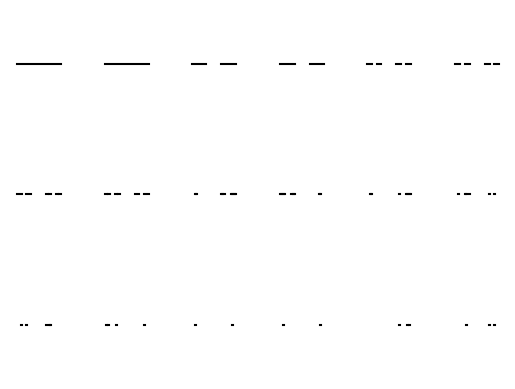

In [3]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
l = np.array(([0, 1/3], [2/3, 1]))
plt.close('all')
plt.subplot(3,3,1)
for each in l:
    plt.plot(each.real, each.imag, 'k')
    plt.axis('off')
for n in range(2,10):
    l = np.vstack((l/3, l/3+2/3))
    plt.subplot(3,3,n)
    for each in l:
        plt.plot(each.real, each.imag, 'k')
    plt.axis('equal')
    plt.axis('off')

### 3. 科赫(Koch)曲线

在单位长度的线段上对其三等分，将中间段换成一个去掉底边的等边三角形，再在每条直线
上重复以上操作，如此进行下去，就得到分形曲线--科赫曲线

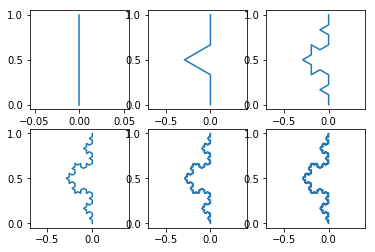

In [20]:
import numpy as np, matplotlib.pyplot as plt
a = np.array([0, 1j])

plt.subplot(2,3,1)

plt.plot(a.real, a.imag)

for i in range(5):
    plt.subplot(2,3,i+2)
    a1 = a/3
    a = np.hstack([a1, a1*(0.5 + 0.86603j)+1j/3,
                   (a1-1j/3)*(0.5 - 0.86603j) +
                   1j*2/3, a1 + 2j/3])
    plt.plot(a.real, a.imag)
    plt.axis('equal')

### 4. Minkowski 香肠

将一条直线四等分，将中间两段去掉，分别在上下代之以两个正方形的三条边，然后对每一个边都重复这样的操作，
所得的曲线叫“Minkowski”香肠。编出画图程序。

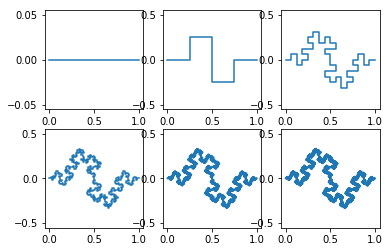

In [26]:
import numpy as np, matplotlib.pyplot as plt
a = np.array([0, 1])

plt.subplot(2,3,1)

plt.plot(a.real, a.imag)

for i in range(5):
    plt.subplot(2,3,i+2)
    a1 = a/4
    a = np.hstack([a1, a1*1j+1/4, a1+1/4+1j/4, a1*(-1j)+1/2+1j/4,
                   a1*(-1j)+1/2, a1+1/2-1j/4,
                   1j*a1+3/4-1j/4, a1 + 3/4])
    plt.plot(a.real, a.imag)
    plt.axis('equal')

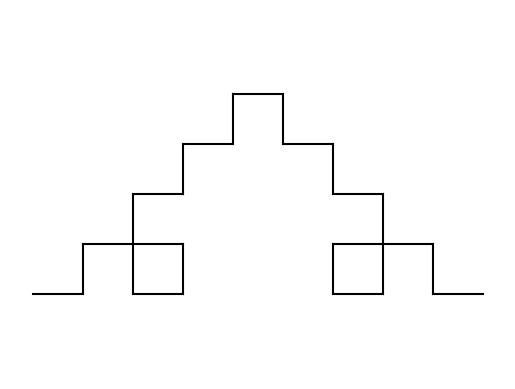

In [21]:
import numpy as np
import matplotlib.pyplot as plt
initial_string = "F"
rewrite_rule = {
    "F": "F+F-F-F+F"
}
def apply_rule(s, rule):
    return ''.join(rule.get(c, c) for c in s)

def generate_koch_curve(initial_string, rewrite_rule, iterations):
    current_string = initial_string
    for _ in range(iterations):
        current_string = apply_rule(current_string, rewrite_rule)
    return current_string
def plot_koch_curve(koch_curve):
    x = 0
    y = 0
    angle = 0
    stack = []
    stack.append((x, y, angle))
    for char in koch_curve:
        if char == 'F':
            x_new = x + 1 * np.cos(angle)
            y_new = y + 1 * np.sin(angle)
            plt.plot([x, x_new], [y, y_new], 'k')
            x, y = x_new, y_new
        elif char == '+':
            angle += np.pi / 2
        elif char == '-':
            angle -= np.pi / 2
    plt.axis('equal')
    plt.axis('off')
    plt.show()

koch_curve = generate_koch_curve(initial_string, rewrite_rule, 2)
plot_koch_curve(koch_curve)